In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def recaman(num, orig=0, start=1, skip=1):
    '''
    orig: the first number in the list
    start: size of the first jump
    skip: how mmuch the jump will increase each time
    '''
    lst = [orig]
    n = start
    while len(lst)<=num:
        #print(lst)
        yield lst[-1]
        if lst[-1]-n>=0 and lst[-1]-n not in lst:
            lst.append(lst[-1]-n)
        else:
            lst.append(lst[-1]+n)
        n = n + skip
            
def semicircle(mn, mx, n_segments=51):
    '''
    draw a semicircle
    '''
    d = n_segments
    rev = mn > mx
    if rev:
        mn2 = mx
        mx = mn
        mn = mn2
    th = np.arange(np.pi, 0 - np.pi/d/2, -np.pi/d)
    c = (mn + mx)/2
    r = (mx - mn)/2
    x = np.zeros(th.shape)+10
    y = np.zeros(th.shape)+10
    for i in range(0, len(th)):
        #print(th[i], np.cos(th[i]), c+r*np.cos(th[i]))
        x[i] = c + r*np.cos(th[i])
        y[i] = r*np.sin(th[i])
    if rev:
        x = x[::-1]
        y = y[::-1]

    return x,y

def draw_recaman(n, orig=0, start=0, skip=1, scale=1, offset=0, stop_approx=False, remove_last=False,
                 new_plot=True, linewidth=1.5):
    r = list(recaman(max(n*4,30), orig=orig, start=start, skip=skip))
    if stop_approx:
        mx = np.zeros(len(r))
        mx_skip = np.zeros(len(r))
        for i in range(len(r)):
            mx[i] = np.max(r[:i+1])
        dff = np.diff(mx)>2
        dff[:n-1] = False
        last_chosen = np.where(dff)[0][0]-1
        if remove_last:
            r = r[:min(last_chosen+1, len(r))]
        else:
            r = r[:min(last_chosen+2, len(r))]
    else:
        r = r[:n]
    n = len(r)-1
    flip = -1
    x = np.zeros((0))
    y = np.zeros((0))
    for i in range(0,n):
        nx, ny = semicircle(r[i], r[i+1])
        x = np.concatenate((x, nx))
        y = np.concatenate((y, flip * ny))
        flip = -flip
    x = x*scale+offset
    y = y*scale
    if new_plot:
        plt.figure(figsize=(12,6))
    plt.plot(x,y, zorder=10000000-n, linewidth=linewidth)
    plt.axis('equal')
    plt.axis('off')
    return n+1

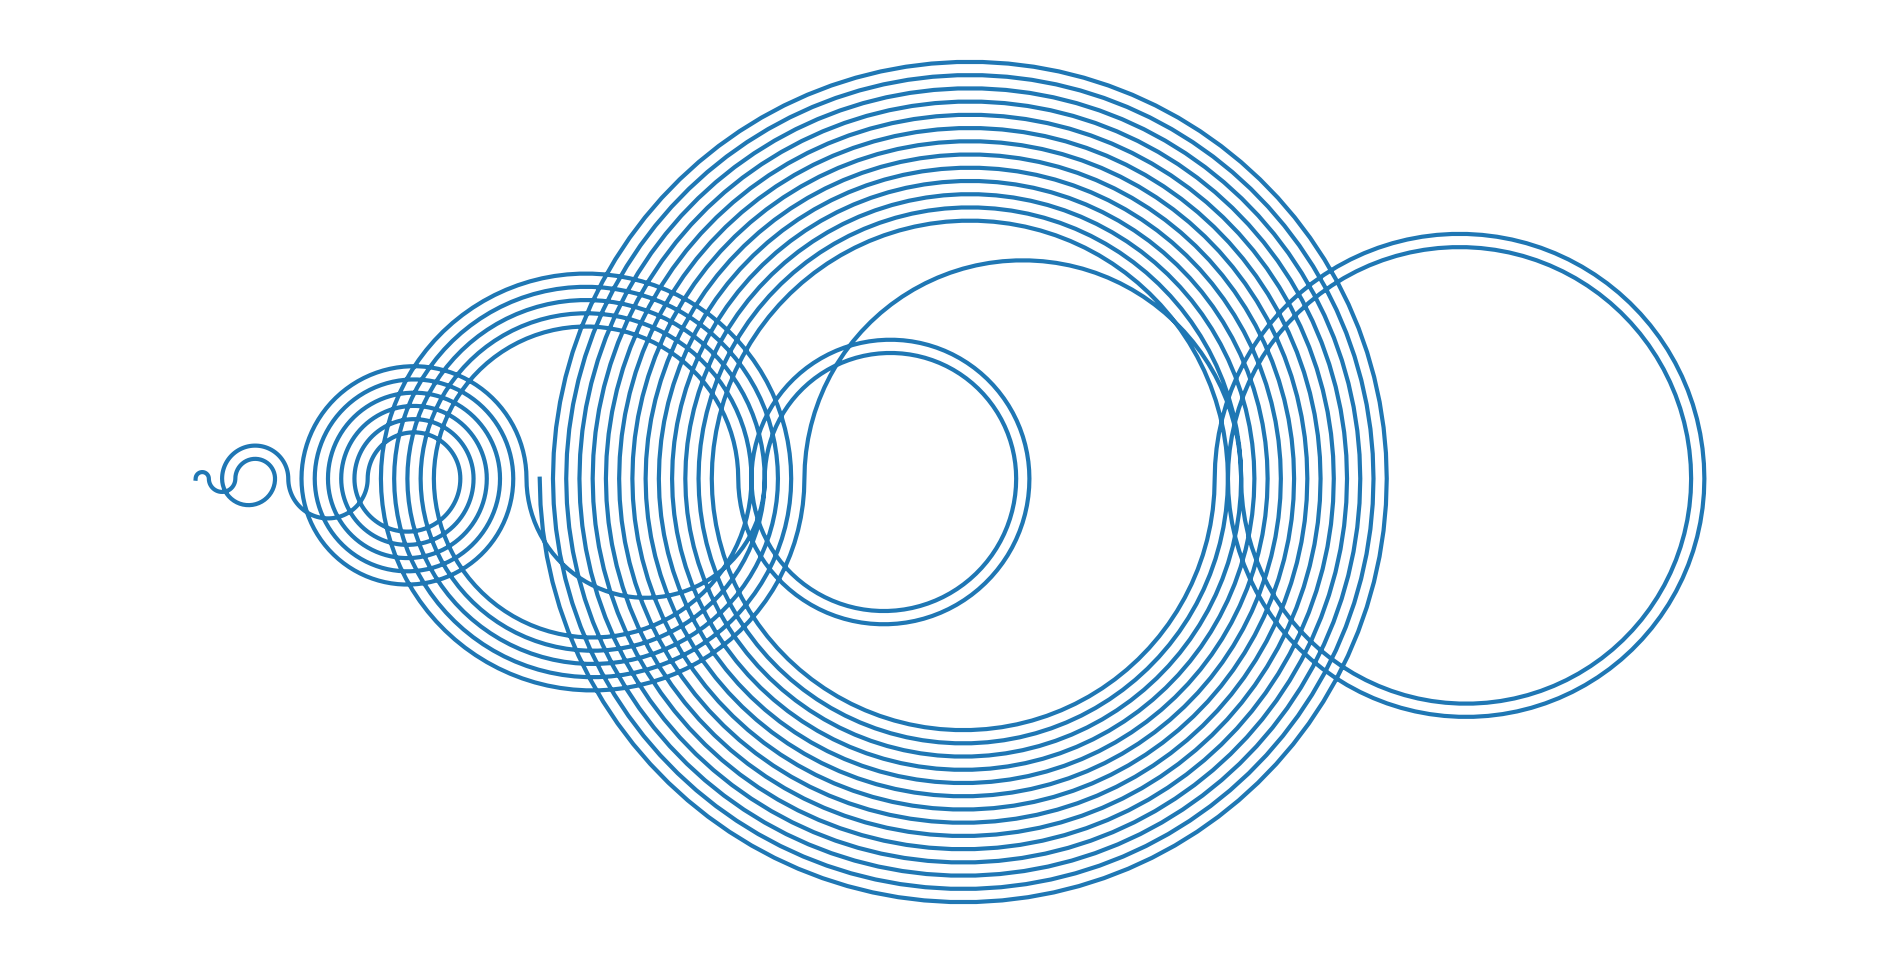

In [110]:
draw_recaman(66, stop_approx=True, remove_last=True)
plt.savefig('examples/recaman.pdf')

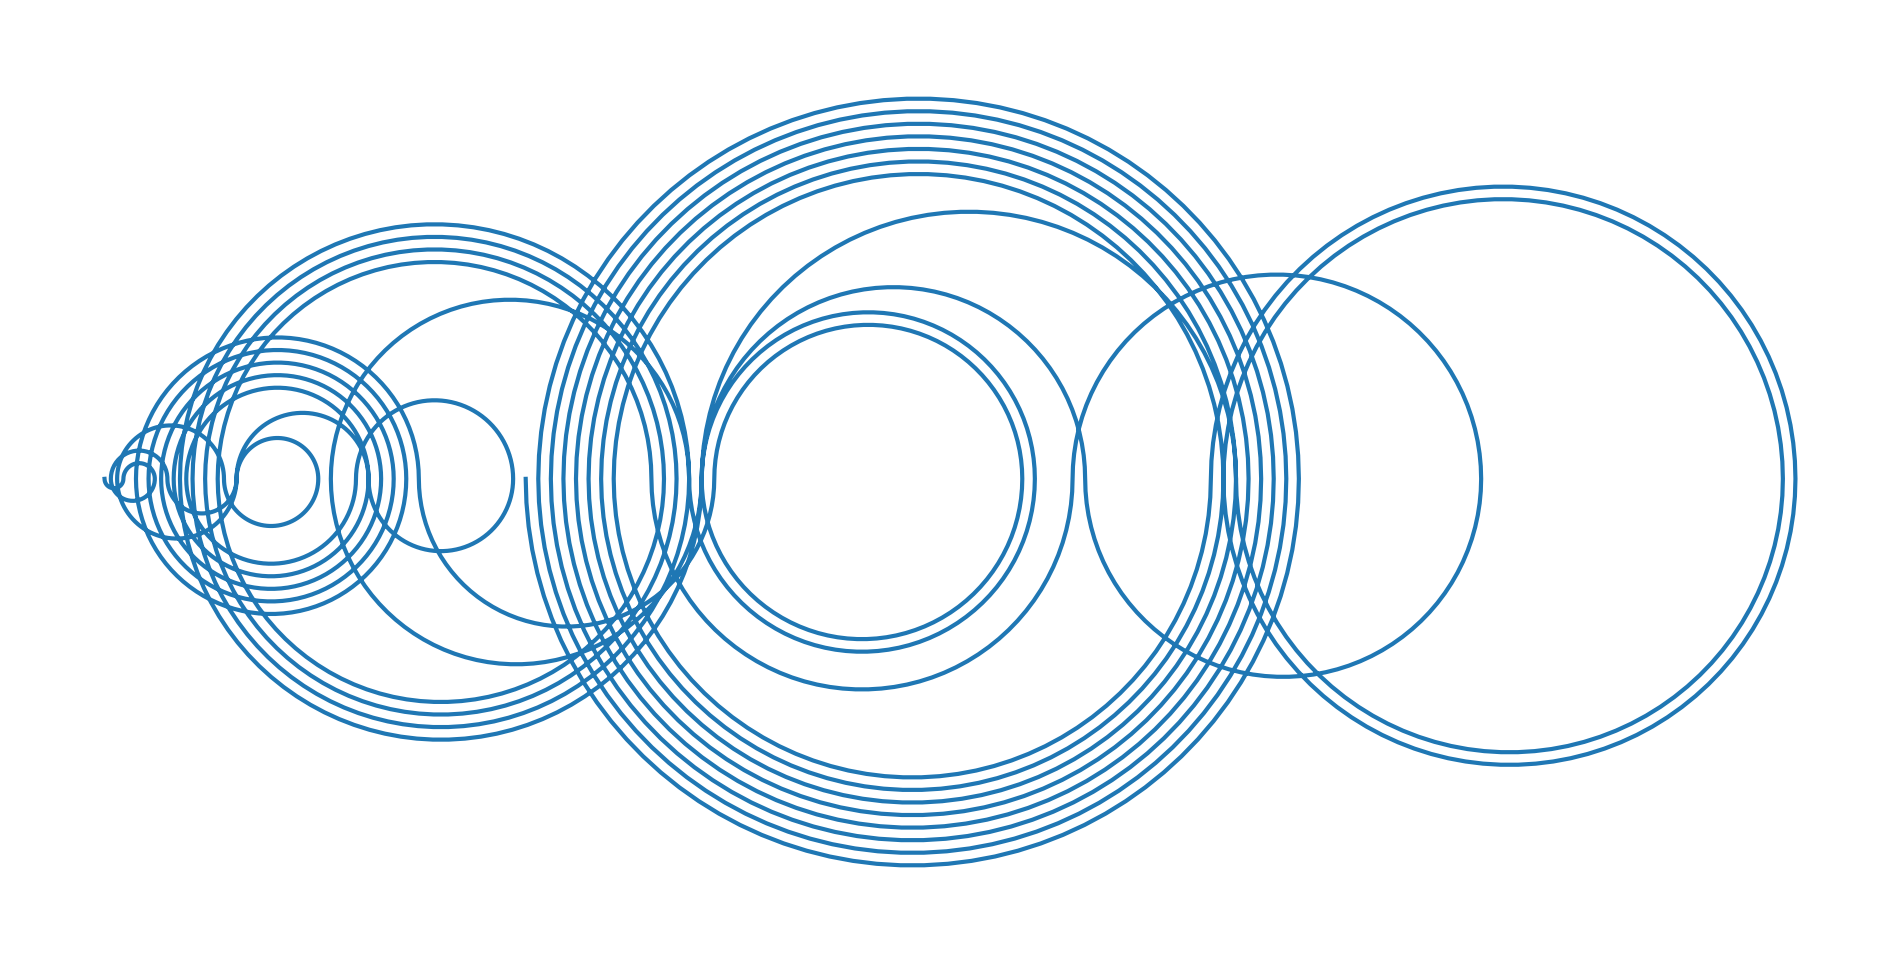

In [111]:
draw_recaman(61, start=3, skip=2, stop_approx=True, remove_last=True)
plt.savefig('examples/recaman.pdf')

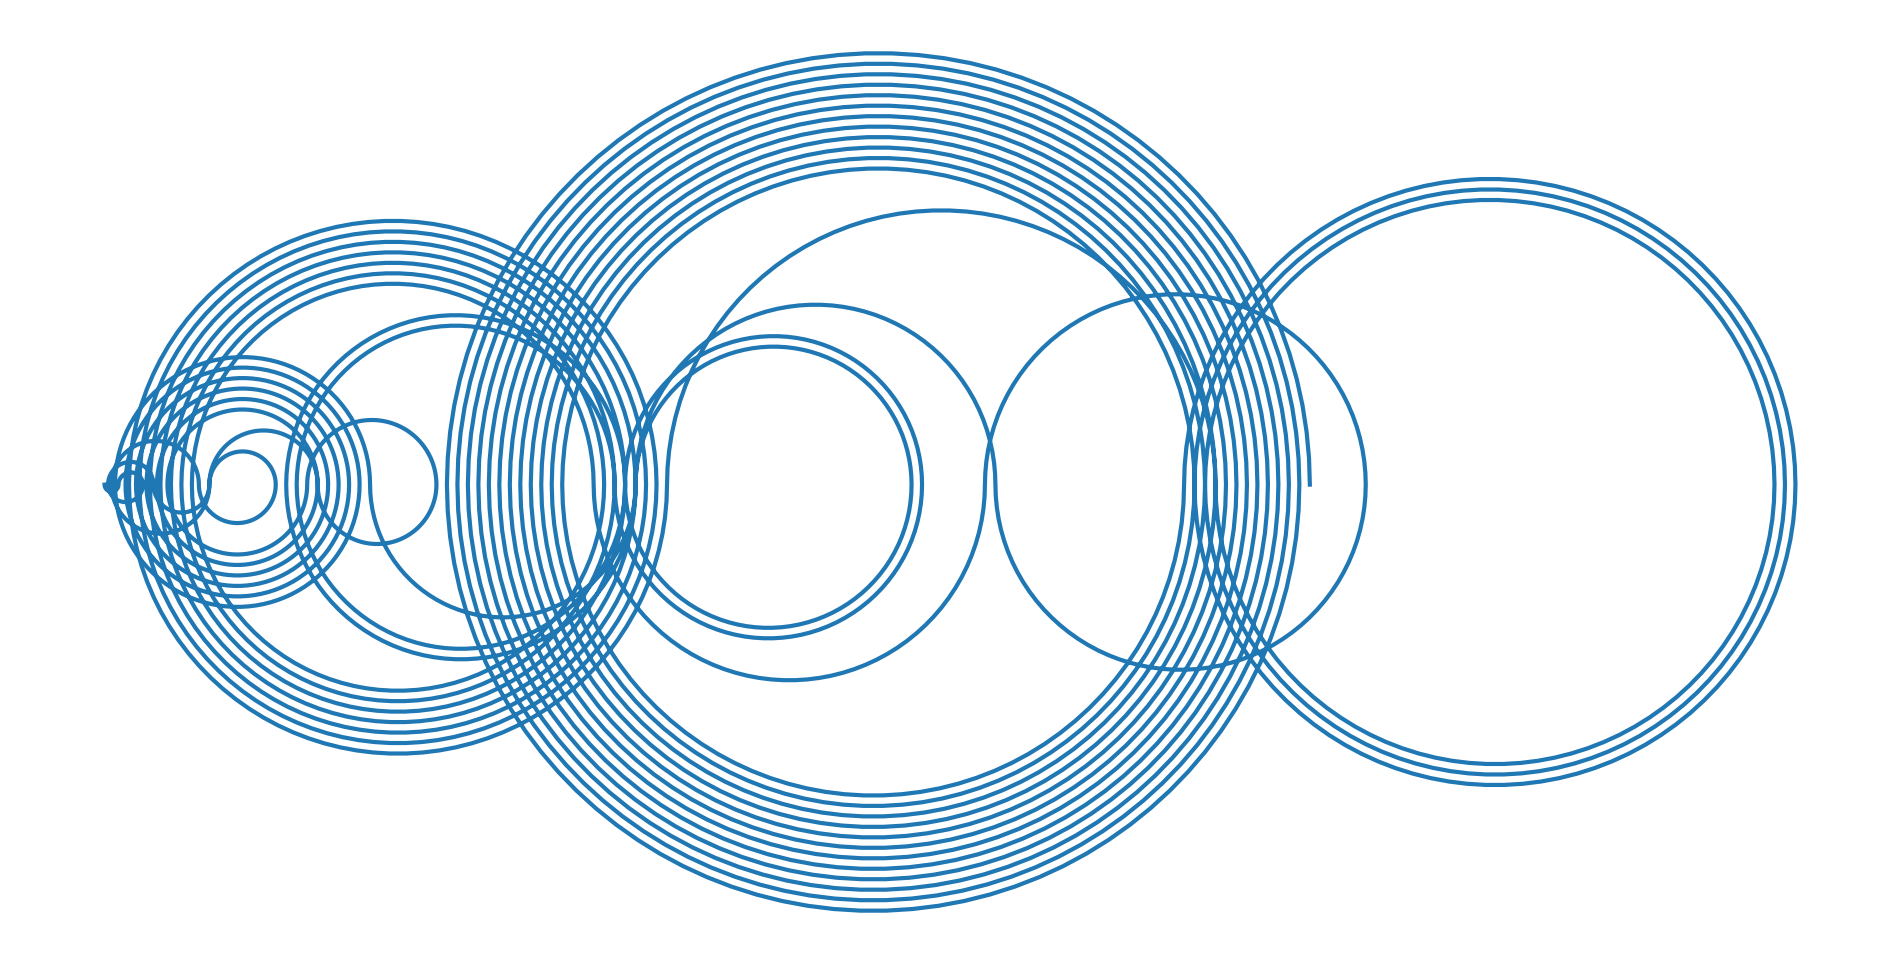

In [112]:
draw_recaman(58, start=4, skip=3, stop_approx=True, remove_last=False)
plt.savefig('examples/r4,3.pdf')

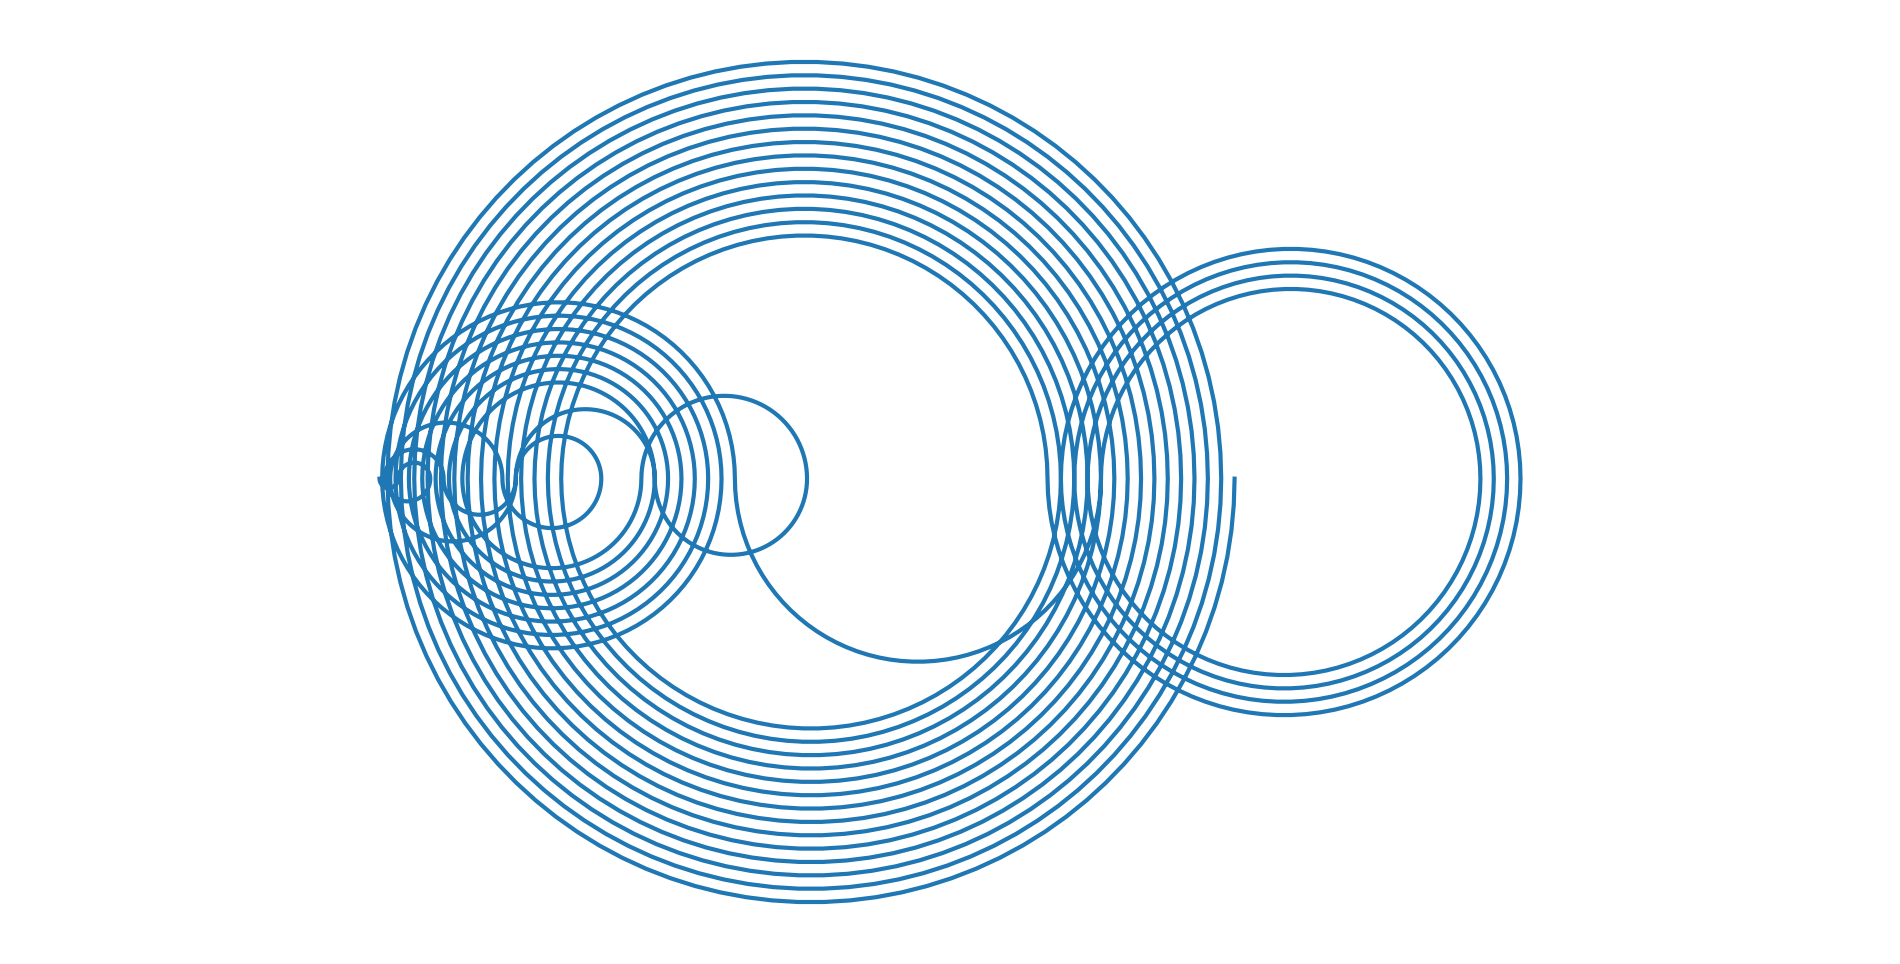

In [113]:
draw_recaman(62, start=7, skip=5, stop_approx=True, remove_last=False)
plt.savefig('examples/f7,5.pdf')

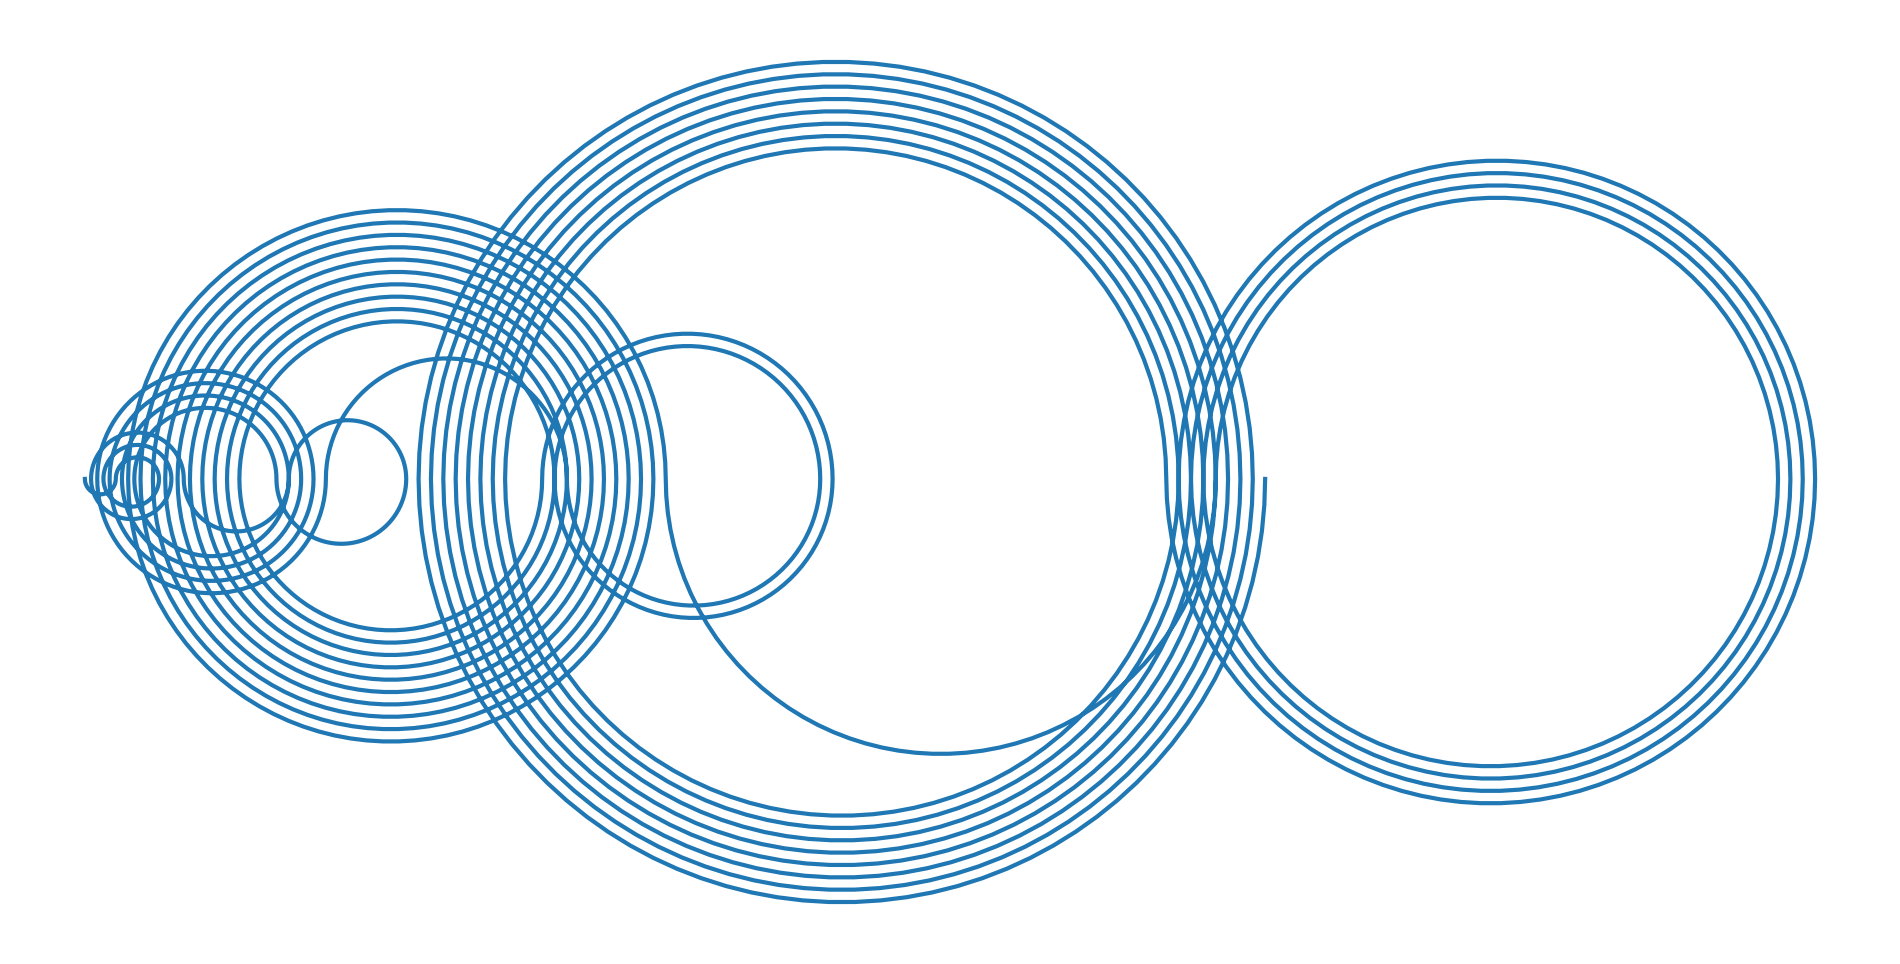

In [114]:
draw_recaman(62, start=5, skip=2, stop_approx=True, remove_last=False)
plt.savefig('examples/f5,2.pdf')

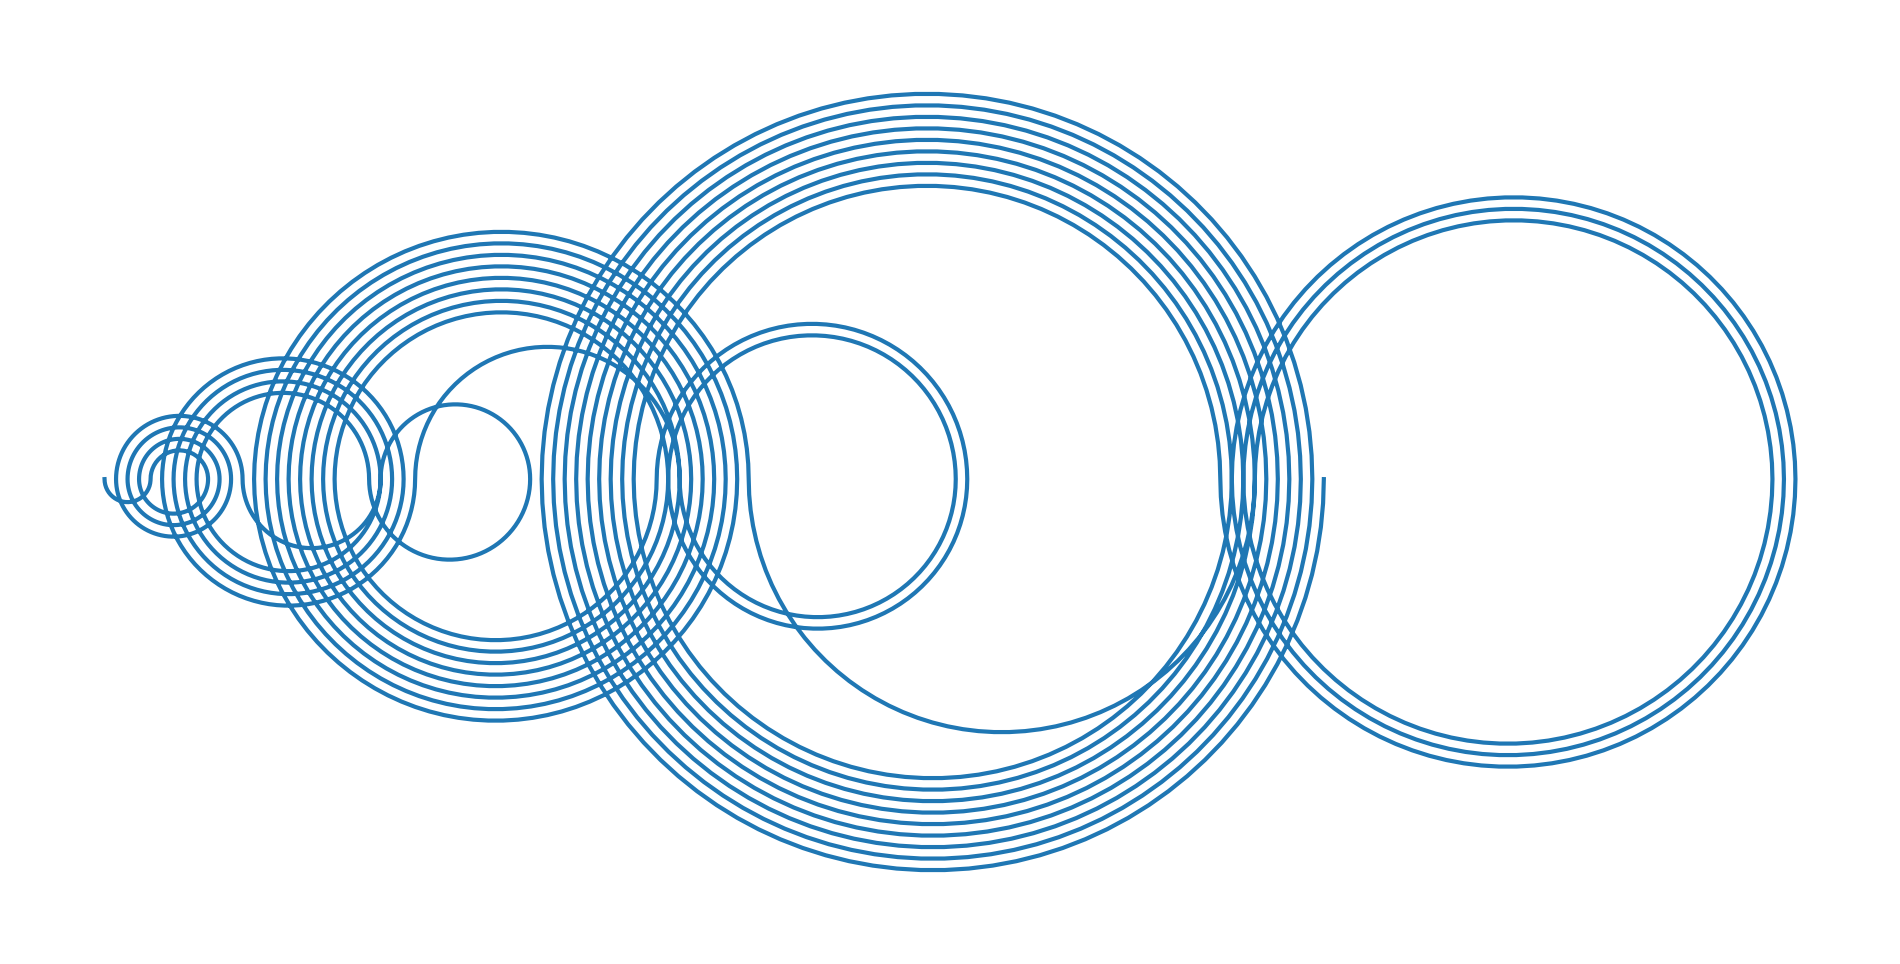

In [115]:
draw_recaman(63, start=12, skip=3, stop_approx=True)
plt.savefig('examples/f12,3.pdf')

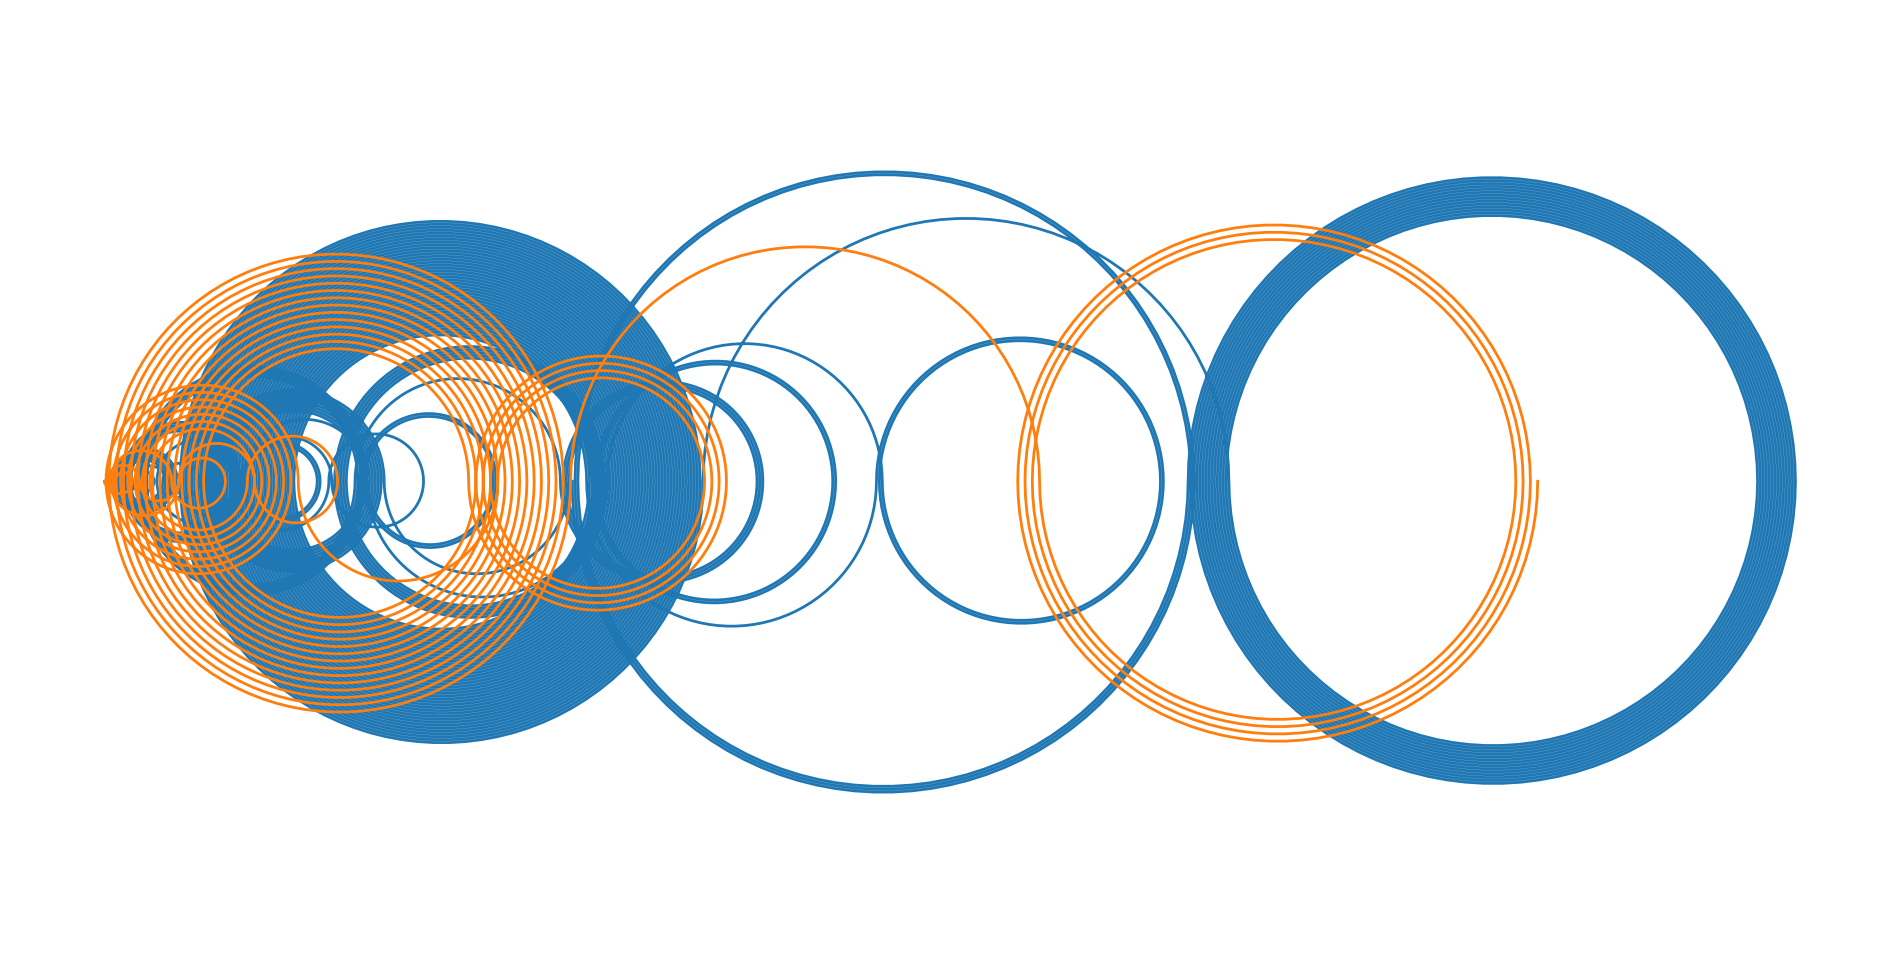

In [116]:
draw_recaman(200, start=3, skip=2, scale=1, linewidth=1, stop_approx=True, remove_last=True)
draw_recaman(72, start=7, skip=5, scale=1, linewidth=1, stop_approx=True, remove_last=True, new_plot=False)
plt.savefig('examples/double.pdf')

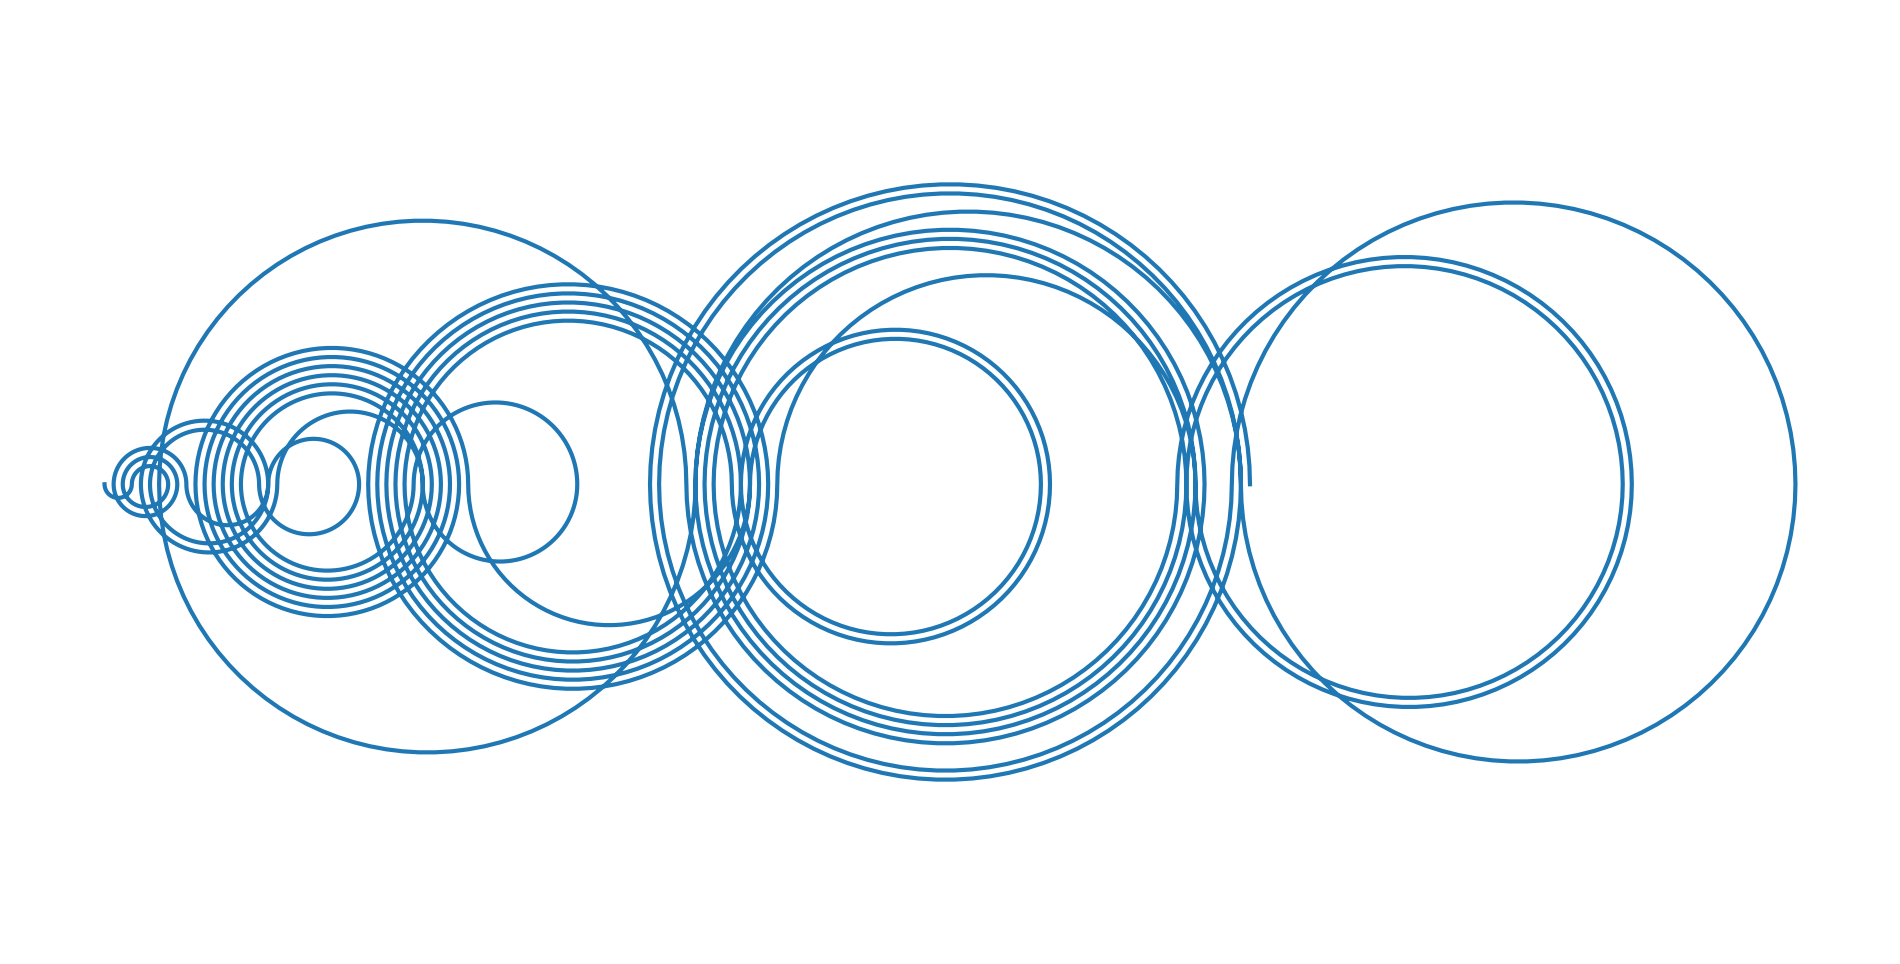

In [117]:
draw_recaman(65, start=3, skip=1, scale=1)
plt.savefig('examples/f3,1.pdf')

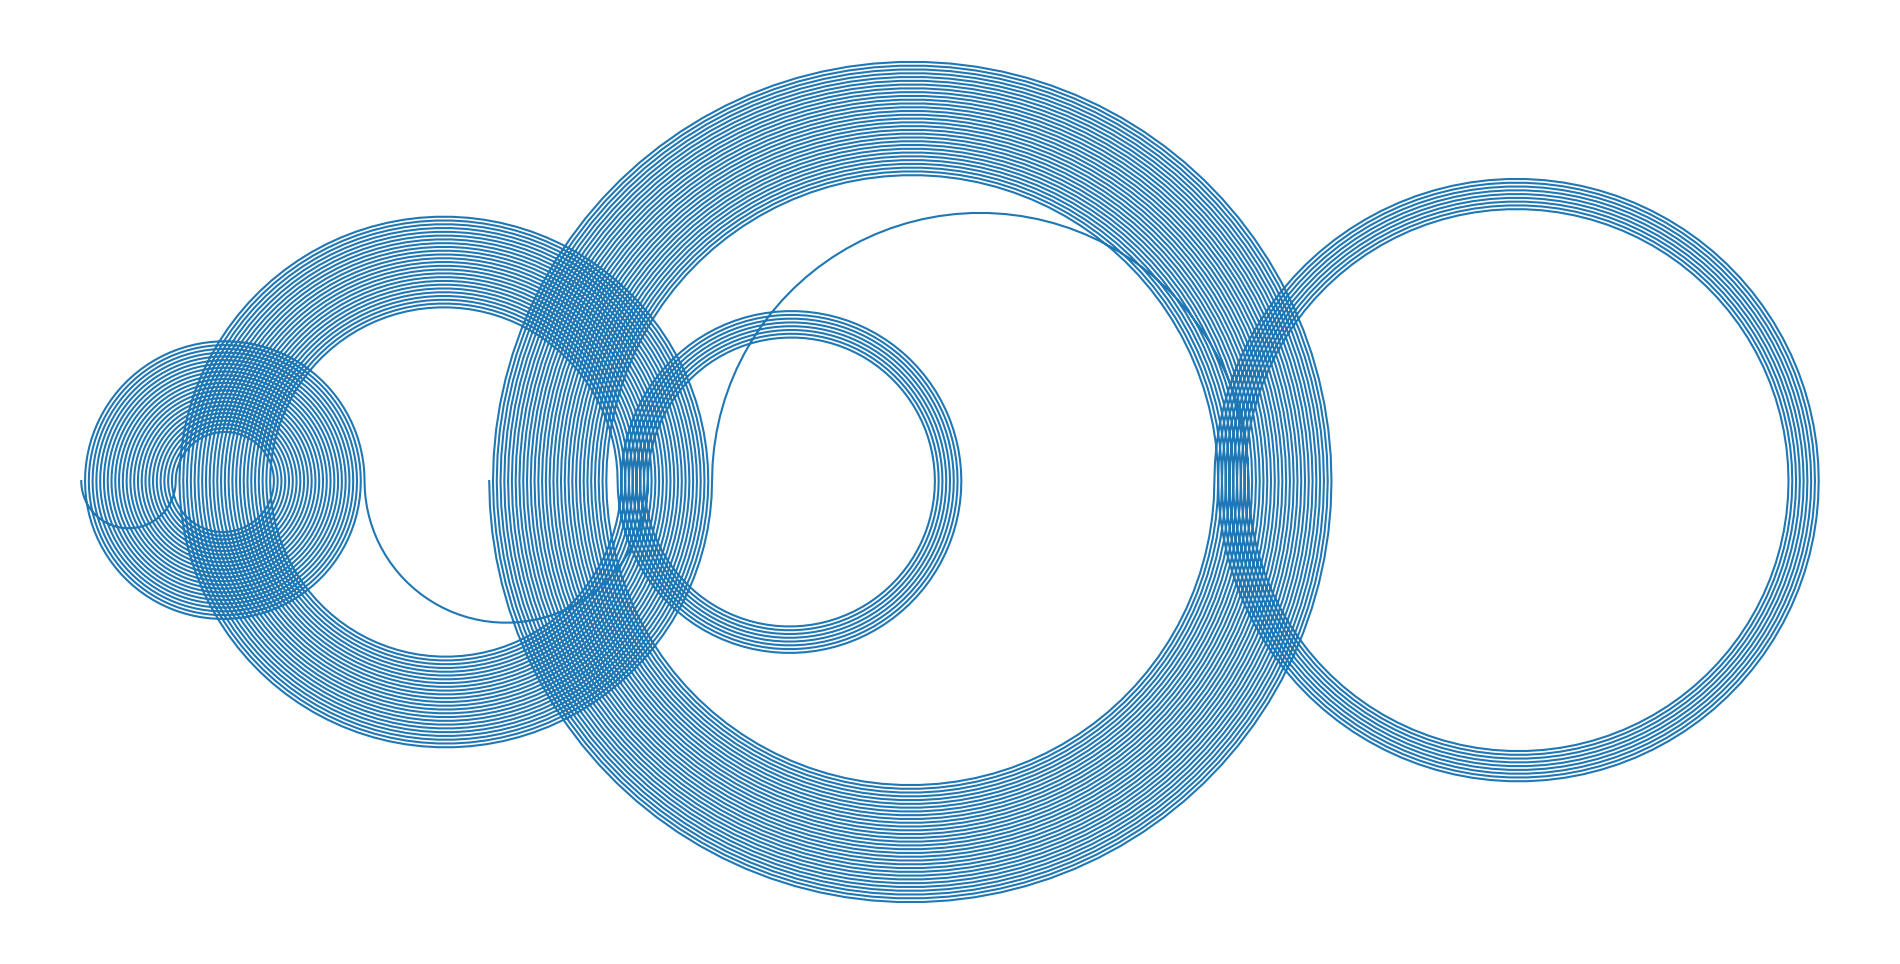

In [118]:
draw_recaman(200, start=25, skip=1, scale=1, linewidth=0.75)
plt.savefig('examples/f25,1,1.pdf')

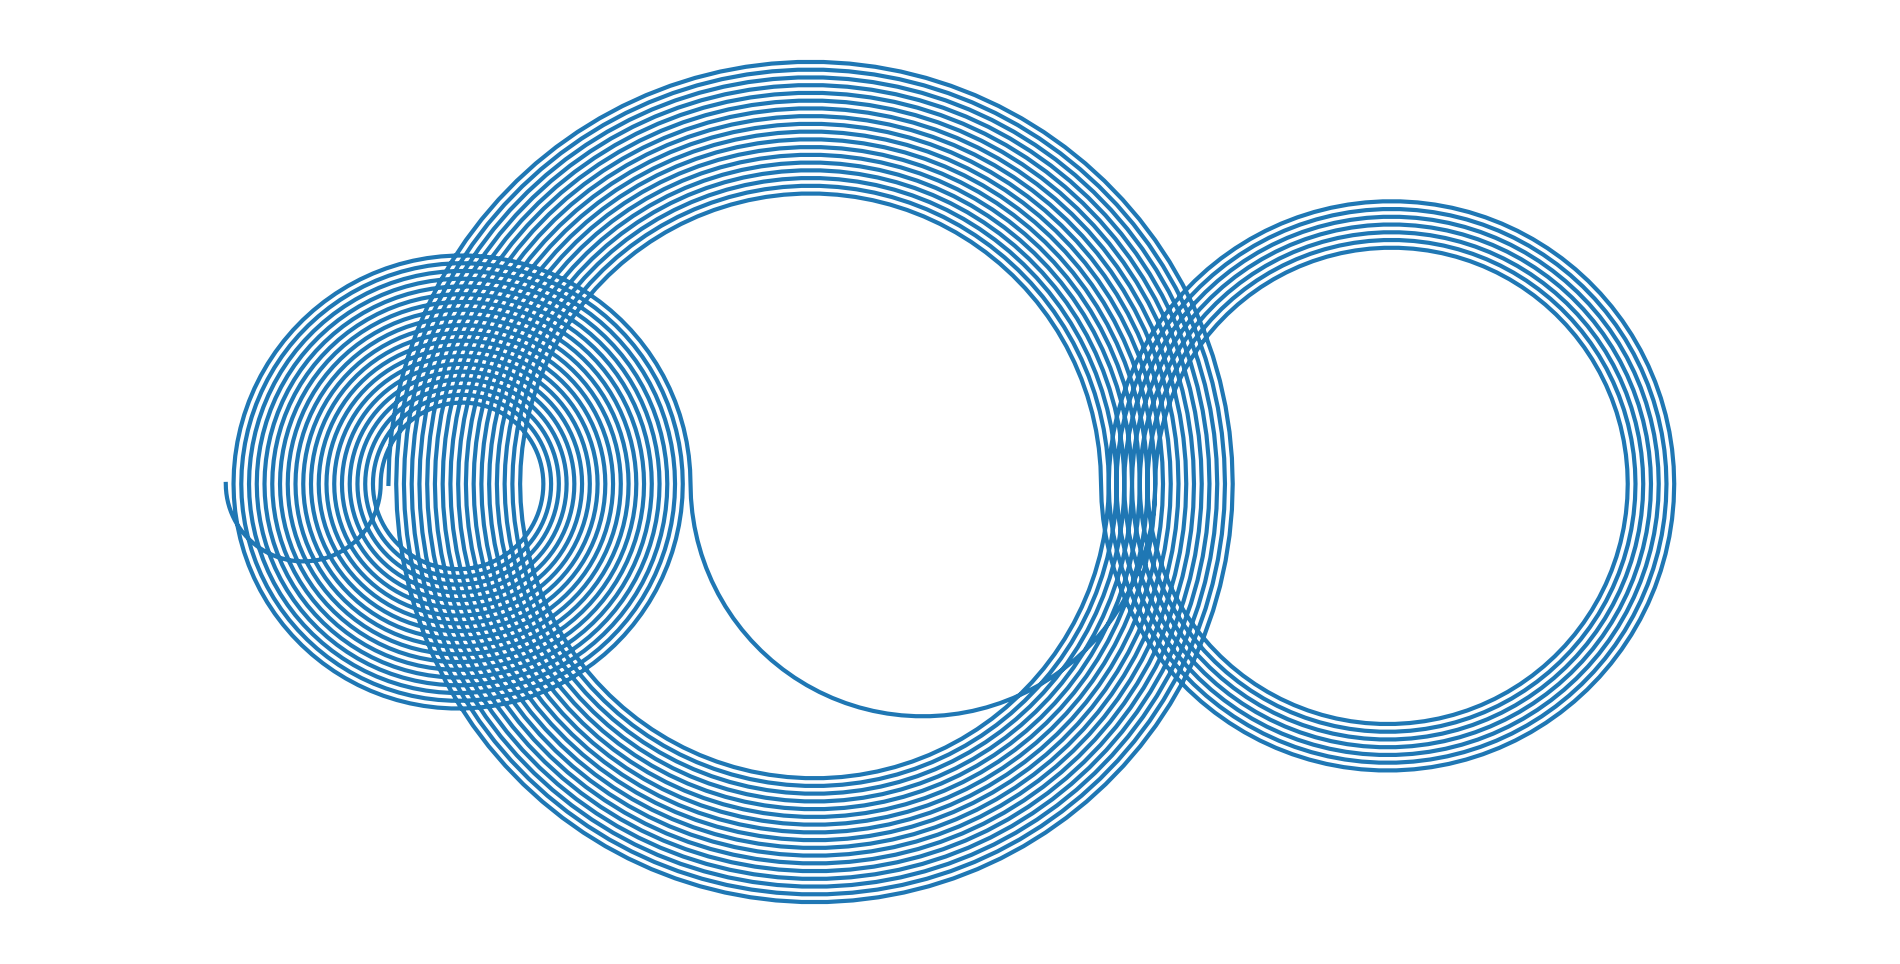

In [119]:
draw_recaman(91, start=20, skip=1, scale=1)
plt.savefig('examples/f20,1.pdf')

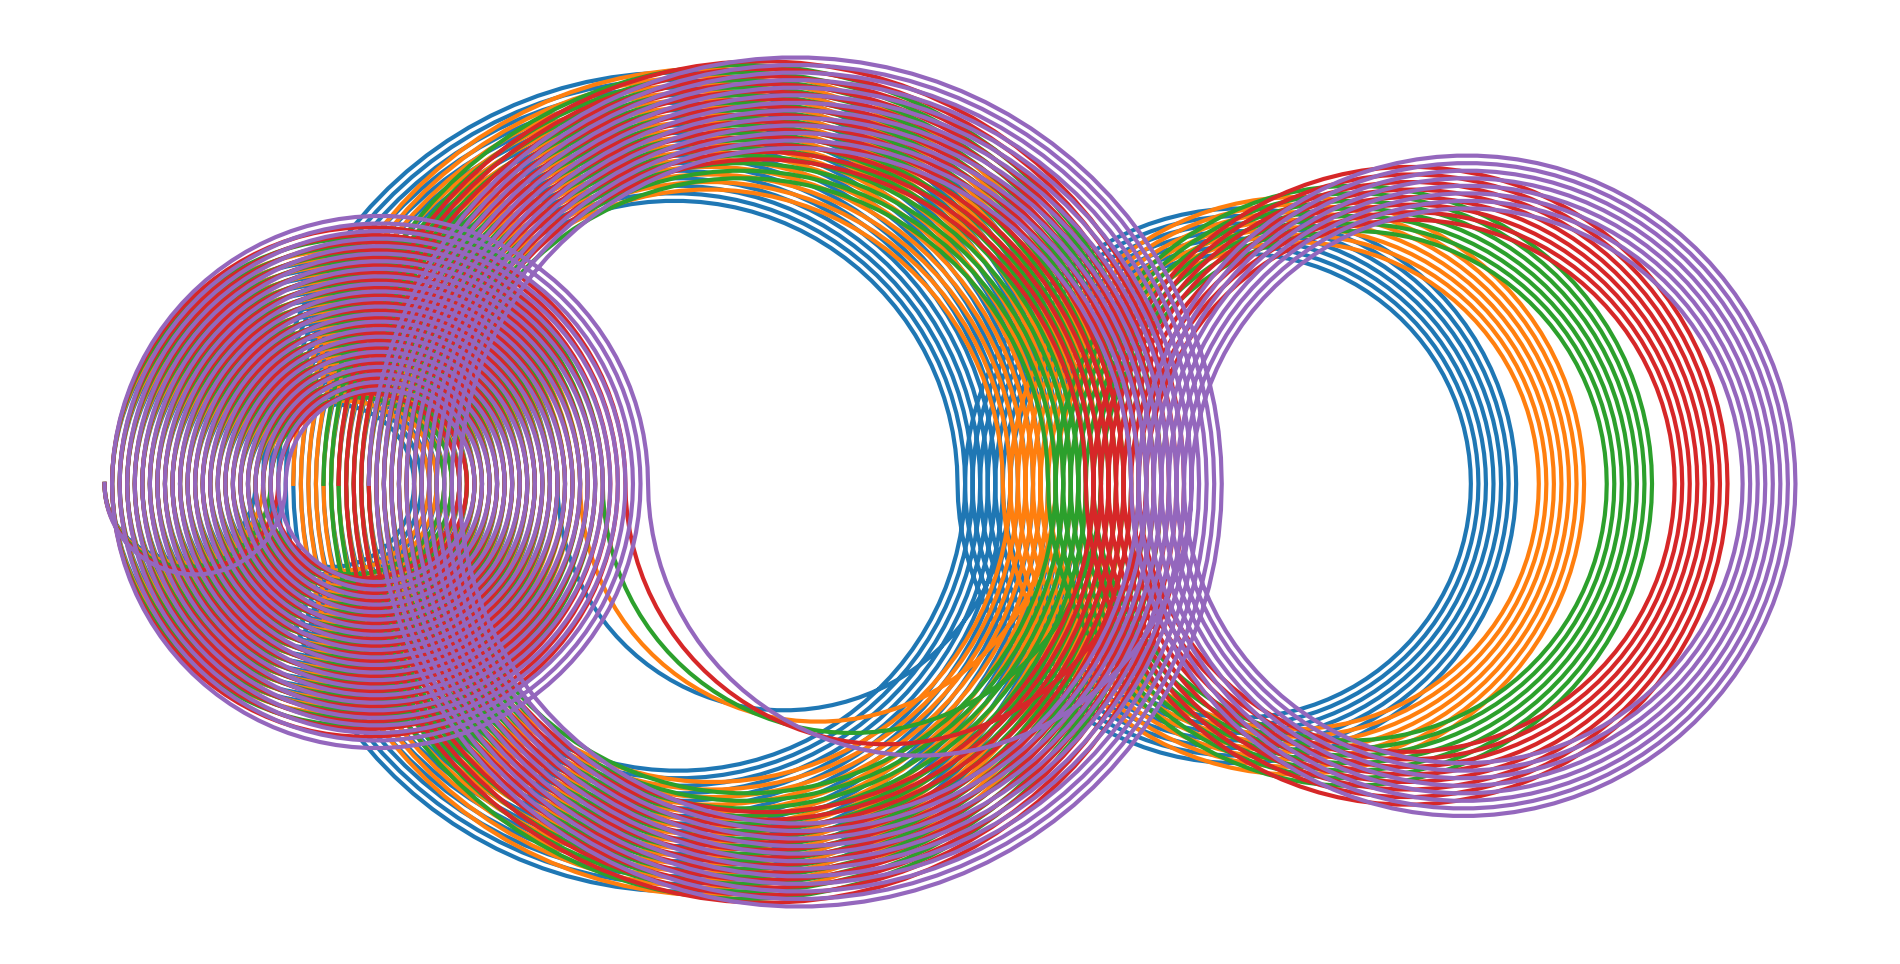

In [121]:
w = 1.5
draw_recaman(91, start=20, skip=1, scale=1, linewidth=w)
draw_recaman(91, start=21, skip=1, scale=1, linewidth=w, new_plot=False)
draw_recaman(91, start=22, skip=1, scale=1, linewidth=w, new_plot=False)
draw_recaman(91, start=23, skip=1, scale=1, linewidth=w, new_plot=False)
draw_recaman(91, start=24, skip=1, scale=1, linewidth=w, new_plot=False);